# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils import draw_hist

# Read Data and Explore it

In [2]:
google_play_df = pd.read_csv('googleplaystore.csv')

In [3]:
google_play_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
google_play_df.shape

(10841, 13)

In [5]:
google_play_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
google_play_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


# Fix Columns

## Fix Rating

In [7]:
# Rating has max of 19 which is not correct
rating_mean = round(google_play_df['Rating'].mean(),1)
google_play_df.loc[google_play_df['Rating']>5 ,'Rating'] = 5
google_play_df.loc[google_play_df['Rating']<0,'Rating'] = 0

# replacing null with the mean of its category
google_play_df['Rating'] = google_play_df['Rating'].fillna(google_play_df.groupby('Category')['Rating'].transform('mean'))

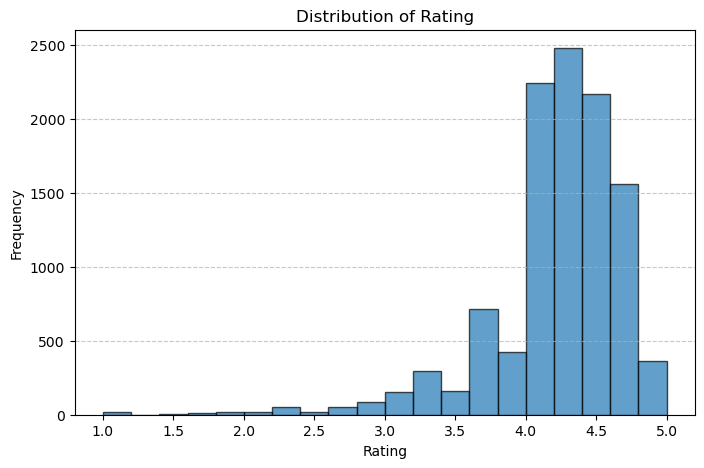

In [8]:
# Viewing the Ratings Columns
draw_hist(google_play_df,'Rating')

## Fix Size

In [9]:
# remove the rows with not specified size 
google_play_df = google_play_df[google_play_df['Size'].str.lower().str.endswith('m')
|google_play_df['Size'].str.lower().str.endswith('k')]

if (google_play_df[google_play_df['Size'].str.lower().str.contains('k')].shape[0]
    + google_play_df[google_play_df['Size'].str.lower().str.contains('m')].shape[0]
    )== google_play_df.shape[0]:
    print("Size now only contains even kilo byte or mega byte")


Size now only contains even kilo byte or mega byte


In [10]:
# convert the 'Size column into mega byte  
def convert_size_to_mb(x):
    x = str(x).lower()
    if x[-1]=='m':
        return float(x[:-1])
    return float(x[:-1])/(1024)

assert convert_size_to_mb('2M')==2
assert convert_size_to_mb('2k')==2/1024

google_play_df['Size'] = google_play_df['Size'].apply(convert_size_to_mb) 
google_play_df['Size']

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10835     9.6
10836    53.0
10837     3.6
10838     9.5
10840    19.0
Name: Size, Length: 9145, dtype: float64

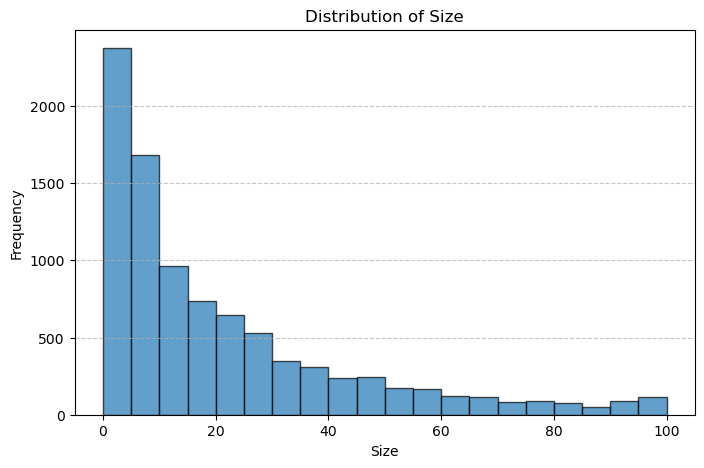

In [11]:
# Viewing the Size Columns
draw_hist(google_play_df,'Size')

## Fix Price

In [12]:
def remove_dollar_sign(x):
    if(x=='0'): return float(x)
    return float(x[1:])
google_play_df['Price'] = google_play_df['Price'].apply(remove_dollar_sign)
google_play_df['Price'].value_counts()                         

Price
0.00      8421
0.99       145
2.99       114
1.99        66
4.99        65
          ... 
389.99       1
19.90        1
1.75         1
14.00        1
1.04         1
Name: count, Length: 87, dtype: int64

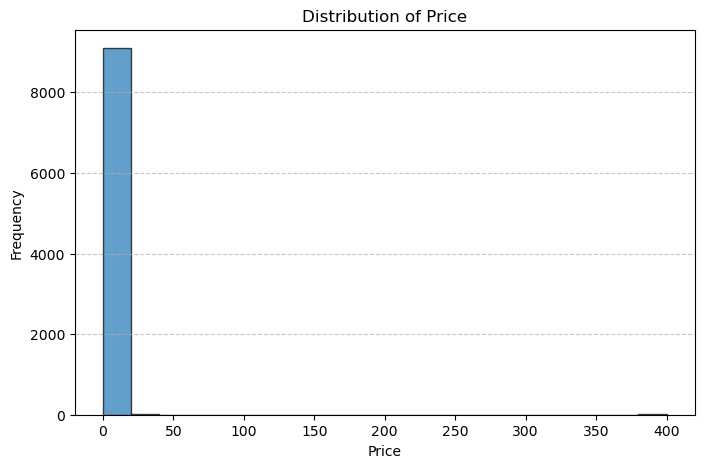

In [13]:
# Viewing the Size Columns
draw_hist(google_play_df,'Price')

In [14]:
print('Number of nulls in Price table',google_play_df['Price'].isnull().sum())

Number of nulls in Price table 0


## Fix Category

In [15]:
google_play_df['Category'].value_counts()

Category
FAMILY                 1832
GAME                   1015
TOOLS                   739
MEDICAL                 434
BUSINESS                400
PERSONALIZATION         355
LIFESTYLE               345
SPORTS                  311
FINANCE                 307
PRODUCTIVITY            303
COMMUNICATION           265
HEALTH_AND_FITNESS      264
PHOTOGRAPHY             254
NEWS_AND_MAGAZINES      216
DATING                  212
SOCIAL                  210
SHOPPING                201
BOOKS_AND_REFERENCE     197
TRAVEL_AND_LOCAL        192
VIDEO_PLAYERS           131
EDUCATION               111
MAPS_AND_NAVIGATION     108
FOOD_AND_DRINK          100
ENTERTAINMENT            90
LIBRARIES_AND_DEMO       82
AUTO_AND_VEHICLES        75
HOUSE_AND_HOME           68
ART_AND_DESIGN           62
EVENTS                   57
WEATHER                  57
PARENTING                54
COMICS                   51
BEAUTY                   47
Name: count, dtype: int64

## Fix Android Verion and Current Verion

In [16]:
google_play_df['Android Ver'].value_counts()

Android Ver
4.1 and up            2317
4.0.3 and up          1453
4.0 and up            1351
4.4 and up             910
2.3 and up             635
5.0 and up             556
4.2 and up             372
2.3.3 and up           276
3.0 and up             241
2.2 and up             241
4.3 and up             231
2.1 and up             134
1.6 and up             116
6.0 and up              57
Varies with device      56
7.0 and up              40
3.2 and up              36
2.0 and up              31
5.1 and up              23
1.5 and up              19
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
1.0 and up               2
4.0.3 - 7.1.1            2
5.0 - 8.0                2
7.1 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: count, dtype: int64

In [17]:
google_play_df['Current Ver'].value_counts()

Current Ver
1.0          807
1.1          263
1.2          178
2.0          150
1.3          145
            ... 
1.9.8.0        1
1.16.2         1
0.81 beta      1
5.4.4          1
2.0.148.0      1
Name: count, Length: 2712, dtype: int64

In [18]:
# Fix Android Ver
#1) drop row with null value in 'Android Ver','Current Ver'
google_play_df = google_play_df.dropna(subset=['Android Ver','Current Ver'])
google_play_df = google_play_df[google_play_df['Android Ver'] != 'Varies with device']
google_play_df = google_play_df[google_play_df['Current Ver'] != 'Varies with device']

In [19]:
google_play_df['Android Ver'] = google_play_df['Android Ver'].str.replace(r'[a-zA-Z]', '', regex=True).str.strip()
google_play_df['Current Ver'] = google_play_df['Current Ver'].str.replace(r'[a-zA-Z]', '', regex=True).str.strip()

In [20]:
# Make Android Version in a consistent form "x.x.x - x.x.x " or "x.x.x"
def modify_ver(x):
    x = str(x)
    versions = []
    for ver in x.split('-'):
        ver = ver.strip()
        if ver.count('.') == 1: 
            ver += '.0'
        versions.append(ver)
    return ' - '.join(versions)
google_play_df['Android Ver'] = google_play_df['Android Ver'].apply(modify_ver)
google_play_df['Current Ver'] = google_play_df['Current Ver'].apply(modify_ver)

In [21]:
google_play_df['Android Ver'].value_counts()

Android Ver
4.1.0            2308
4.0.3            1443
4.0.0            1348
4.4.0             921
2.3.0             632
5.0.0             553
4.2.0             370
2.3.3             276
2.2.0             241
3.0.0             240
4.3.0             229
2.1.0             134
1.6.0             115
6.0.0              56
7.0.0              40
3.2.0              36
2.0.0              30
5.1.0              23
1.5.0              18
3.1.0              10
2.0.1               7
8.0.0               6
1.0.0               2
4.0.3 - 7.1.1       2
7.1.0               2
5.0.0 - 8.0.0       2
2.2.0 - 7.1.1       1
7.0.0 - 7.1.1       1
5.0.0 - 6.0.0       1
4.1.0 - 7.1.1       1
5.0.0 - 7.1.1       1
Name: count, dtype: int64

## Fix Installs

In [22]:
google_play_df['Installs']

0           10,000+
1          500,000+
2        5,000,000+
4          100,000+
5           50,000+
            ...    
10834          500+
10835           10+
10836        5,000+
10837          100+
10838        1,000+
Name: Installs, Length: 9049, dtype: object

In [23]:
def fix_installs(x):
    x = x[:-1]
    x = x.replace(r',','')
    return float(x)
google_play_df['Installs'] = google_play_df['Installs'].apply(fix_installs)

In [24]:
google_play_df['Installs']

0          10000.0
1         500000.0
2        5000000.0
4         100000.0
5          50000.0
           ...    
10834        500.0
10835         10.0
10836       5000.0
10837        100.0
10838       1000.0
Name: Installs, Length: 9049, dtype: float64

## Fix Reviews

In [25]:
google_play_df['Reviews'] = pd.to_numeric(google_play_df['Reviews'],errors='coerce')

In [26]:
google_play_df['Reviews'].isnull().sum()

0

## Fix Genres

In [27]:
google_play_df['Genres'] = google_play_df['Genres'].str.split(';')

## Fix Last Updated

In [28]:
# convert Last Updated to datetime64 type
google_play_df['Last Updated'] = pd.to_datetime(google_play_df['Last Updated'])

## Reset Index

In [29]:
google_play_df.reset_index(drop=True, inplace=True)

# Look at Data After Fixing it

In [30]:
google_play_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9049 entries, 0 to 9048
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9049 non-null   object        
 1   Category        9049 non-null   object        
 2   Rating          9049 non-null   float64       
 3   Reviews         9049 non-null   int64         
 4   Size            9049 non-null   float64       
 5   Installs        9049 non-null   float64       
 6   Type            9049 non-null   object        
 7   Price           9049 non-null   float64       
 8   Content Rating  9049 non-null   object        
 9   Genres          9049 non-null   object        
 10  Last Updated    9049 non-null   datetime64[ns]
 11  Current Ver     9049 non-null   object        
 12  Android Ver     9049 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(7)
memory usage: 919.2+ KB


In [31]:
google_play_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,[Art & Design],2018-01-07,1.0.0,4.0.3
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,"[Art & Design, Pretend Play]",2018-01-15,2.0.0,4.0.3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,[Art & Design],2018-08-01,1.2.4,4.0.3
3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,"[Art & Design, Creativity]",2018-06-20,1.1.0,4.4.0
4,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000.0,Free,0.0,Everyone,[Art & Design],2017-03-26,1.0.0,2.3.0


# Save cleaned data

In [32]:
google_play_df.to_csv('google_play_cleaned.csv')

# Answer statistical questions

## 1. What is the most expensive app on the Play Store?

In [33]:
google_play_df[google_play_df['Price'] == google_play_df['Price'].max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3169,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3,10000.0,Paid,400.0,Everyone,[Lifestyle],2018-05-03,1.0.1,4.1.0


## 2. Which genre has the highest number of apps?

In [34]:
genre_counts = google_play_df['Genres'].explode().value_counts()
most_popular_genre = genre_counts.idxmax()
most_popular_count = genre_counts.max()
print("Genre with the highest number of apps:", most_popular_genre)

Genre with the highest number of apps: Tools


## 3. What is the average size of free vs. paid apps?

In [35]:
average_size_free_apps = google_play_df[google_play_df['Type']=='Free']['Size'].mean()
average_size_paid_apps = google_play_df[google_play_df['Type']=='Paid']['Size'].mean()
print("Average size for free apps",average_size_free_apps)
print("Average size for paid apps",average_size_paid_apps)

Average size for free apps 21.638208447230472
Average size for paid apps 19.43634751966783


## 4. What are the top 5 most expensive apps with a perfect rating (5)?


In [36]:
google_play_df[google_play_df['Rating'] == 5].sort_values(by='Price', ascending=False).head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4161,AP Art History Flashcards,FAMILY,5.0,1,96.000000,10.0,Paid,29.99,Mature 17+,[Education],2016-01-19,3.30.0,4.0.0
5955,USMLE Step 2 CK Flashcards,FAMILY,5.0,1,40.000000,10.0,Paid,19.99,Everyone,[Education],2014-05-26,2.47.0,2.2.0
3937,Hey AJ! It's Bedtime!,FAMILY,5.0,1,63.000000,10.0,Paid,4.99,Everyone,[Education],2018-04-04,1.0.59,2.3.0
5712,TI-84 CE Graphing Calculator Manual TI 84,FAMILY,5.0,1,27.000000,100.0,Paid,4.99,Everyone,[Education],2018-03-28,1.5.2,4.1.0
4154,meStudying: AP English Lit,FAMILY,5.0,1,0.639648,10.0,Paid,4.99,Everyone,[Education],2013-08-31,1.3.0,2.0.1


## 5. How many apps have received more than 50K reviews?


In [37]:
num_of_apps_with_more_than_50k = len(google_play_df[google_play_df['Reviews']>50_000])
print("Number of apps with more than 50k reviews",num_of_apps_with_more_than_50k)

Number of apps with more than 50k reviews 1699


## 6. What is the average price of apps, grouped by genre and number of installs?


In [38]:
df_exploded = google_play_df.explode('Genres')
avg_price_by_genre_installs = df_exploded.groupby(['Genres', 'Installs'])['Price'].mean().reset_index()
print(avg_price_by_genre_installs)

     Genres    Installs   Price
0    Action        10.0  0.0000
1    Action        50.0  0.9950
2    Action       100.0  1.3700
3    Action       500.0  0.9950
4    Action      1000.0  0.3725
..      ...         ...     ...
723    Word    100000.0  0.0000
724    Word   1000000.0  0.0000
725    Word   5000000.0  0.0000
726    Word  10000000.0  0.0000
727    Word  50000000.0  0.0000

[728 rows x 3 columns]


## 7. How many apps have a rating higher than 4.7, and what is their average price?


In [39]:
apps_with_higher_rate = google_play_df[google_play_df['Rating']> 4.7]
average_price = apps_with_higher_rate['Price'].mean()
print("Number of apps",len(apps_with_higher_rate))
print("Average price",average_price)

Number of apps 563
Average price 0.47985790408525747


## 8. What is Google's estimated revenue from apps with 5,000,000+ installs?


In [40]:
# (Assuming Google takes a 30% cut from app sales)
apps_with_this_number_of_installs = google_play_df[google_play_df['Installs']>=5_000_000]
estimated_revenue=(apps_with_this_number_of_installs['Price']*apps_with_this_number_of_installs['Installs']*.3).sum()
print("Revenue from apps with 5,000,000+ installs:", estimated_revenue)

Revenue from apps with 5,000,000+ installs: 2970000.0


## 9. What are the maximum and minimum sizes of free vs. paid apps?


In [41]:
free_apps = google_play_df[google_play_df['Type']=='Free']['Size']
paid_apps = google_play_df[google_play_df['Type']=='Paid']['Size']
print('maximum sizes of free',free_apps.max())
print('minimum sizes of free',free_apps.min())

print('maximum sizes of paid',paid_apps.max())
print('minimum sizes of paid',paid_apps.min())

maximum sizes of free 100.0
minimum sizes of free 0.00830078125
maximum sizes of paid 100.0
minimum sizes of paid 0.0166015625


## 10. Is there a correlation between an app’s rating, number of reviews, size, and its price?

           Rating   Reviews      Size     Price
Rating   1.000000  0.078972  0.079220 -0.019668
Reviews  0.078972  1.000000  0.238536 -0.009790
Size     0.079220  0.238536  1.000000 -0.022909
Price   -0.019668 -0.009790 -0.022909  1.000000


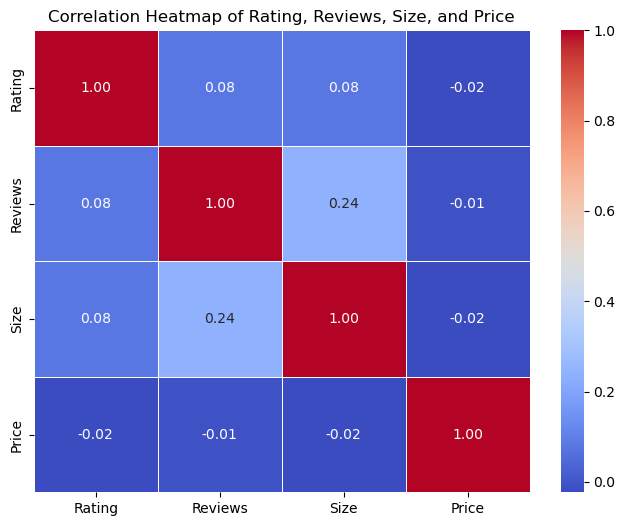

In [42]:
numeric_columns = ['Rating', 'Reviews', 'Size', 'Price']
google_play_df_cleaned = google_play_df[numeric_columns]
correlation_matrix = google_play_df_cleaned.corr()
print(correlation_matrix)
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Rating, Reviews, Size, and Price")
plt.show()
# There is a weak correlation between Rating, Reviews, Size, and Price.

## 11. How many apps exist for each type (free/paid) across different content ratings?


In [43]:
free_apps_count = google_play_df[google_play_df['Type'] == 'Free'].groupby('Content Rating')['App'].count()
paid_apps_count = google_play_df[google_play_df['Type'] == 'Paid'].groupby('Content Rating')['App'].count()

print("Free apps by content rating:\n", free_apps_count)
print("\nPaid apps by content rating:\n", paid_apps_count)

Free apps by content rating:
 Content Rating
Adults only 18+       2
Everyone           6731
Everyone 10+        298
Mature 17+          382
Teen                919
Unrated               2
Name: App, dtype: int64

Paid apps by content rating:
 Content Rating
Everyone        619
Everyone 10+     28
Mature 17+       17
Teen             51
Name: App, dtype: int64


## 12. How many apps are compatible with Android version 4.x?


In [44]:
google_play_df[['Min Ver', 'Max Ver']] = google_play_df['Android Ver'].str.split(' - ', expand=True)
google_play_df['Max Ver'] = google_play_df['Max Ver'].where(google_play_df['Android Ver'].str.contains(' - '))
compatible_apps = google_play_df[
    (google_play_df['Min Ver'].str[0:3] <= '4.0') & (
        google_play_df['Max Ver'].isna()
        |(google_play_df['Max Ver'].str[0:3] >= '4.0'))
]

print("Number of apps compatible with Android version 4.x:", len(compatible_apps))

Number of apps compatible with Android version 4.x: 4535
